In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import integrate

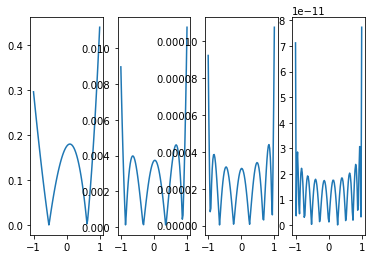

In [4]:
def f1(x):
    return np.exp(x) #or abs(x)

def g(n):
    v,err=integrate.quad(lambda x:x**n,-1,1)
    return v

def b1(n):
    v,err=integrate.quad(lambda x:f1(x)*x**n,-1,1)
    return v

def p(k,x):
    G=[]
    for i in range(k+1):
        G.append([])
        for j in range(k+1):
            G[i].append(g(i+j))
    d=[]
    for i in range(k+1):
        d.append(b1(i))
    a=[]
    a=linalg.solve(G,d)
    a=a.tolist()
    i=0
    p=0
    while i<k+1:
        p=p+a[i]*x**i
        i=i+1
    return p

def delta1(k,x):
    return abs(f1(x)-p(k,x))

plt.figure()
x=np.linspace(-1,1,100)
ax1=plt.subplot(1,4,1)
plt.plot(x,delta1(1,x))
ax2=plt.subplot(1,4,2)
plt.plot(x,delta1(3,x))
ax3=plt.subplot(1,4,3)
plt.plot(x,delta1(5,x))
ax4=plt.subplot(1,4,4)
plt.plot(x,delta1(10,x))
plt.show()

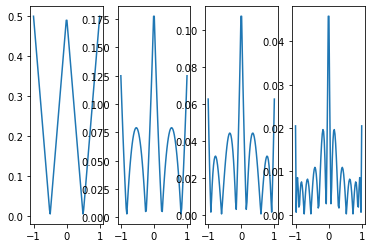

In [10]:
def f2(x):
    return abs(x)

def g(n):
    v,err=integrate.quad(lambda x:x**n,-1,1)
    return v

def b2(n):
    v,err=integrate.quad(lambda x:f2(x)*x**n,-1,1)
    return v

def p2(k,x):
    G=[]
    for i in range(k+1):
        G.append([])
        for j in range(k+1):
            G[i].append(g(i+j))
    d=[]
    for i in range(k+1):
        d.append(b2(i))
    a=[]
    a=linalg.solve(G,d)
    a=a.tolist()
    i=0
    p=0
    while i<k+1:
        p=p+a[i]*x**i
        i=i+1
    return p

def delta2(k,x):
    return abs(f2(x)-p2(k,x))

plt.figure()
x=np.linspace(-1,1,100)
ax1=plt.subplot(1,4,1)
plt.plot(x,delta2(1,x))
ax2=plt.subplot(1,4,2)
plt.plot(x,delta2(3,x))
ax3=plt.subplot(1,4,3)
plt.plot(x,delta2(5,x))
ax4=plt.subplot(1,4,4)
plt.plot(x,delta2(10,x))
plt.show()

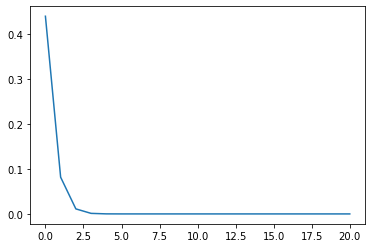

In [5]:
def DELTA1(k):
    x=np.linspace(-1,1,100)
    return max(delta1(k,x))

plt.figure()
k=np.zeros(21)
s=np.zeros(21)
for i in range(21):
    k[i]=i
    s[i]=DELTA1(i+1)
plt.plot(k,s)

<ipython-input-6-8bee83424e55>:38: LinAlgWarning: Ill-conditioned matrix (rcond=1.06669e-55): result may not be accurate.
  co=linalg.solve(GG,d)


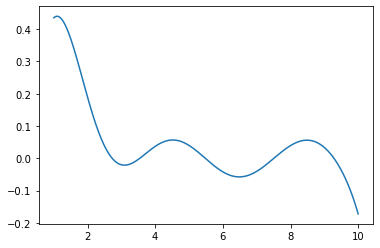

In [6]:
def gg(n,k):
    sum=0
    for i in range(21):
        sum=sum+k[i]**n
    return sum

def dd(n,k,s):
    sum=0
    for i in range(21):
        sum=sum+k[i]**n*s[i]
    return sum

def ff(co,x):
    sum=0
    for i in range(1,21):
        sum=sum+co[i-1]*x**i
    return sum

k=np.zeros(22)
s=np.zeros(22)
for i in range(1,21):
    k[i]=i
    s[i]=DELTA1(i)

GG=[]
for i in range(21):
        GG.append([])
        for j in range(21):
            GG[i].append(gg(i+j,k))
            
d=[]
i=0
while(i<21):
    d.append(dd(i,k,s))
    i=i+1

co=[]
co=linalg.solve(GG,d)
co=co.tolist()
plt.figure()
x=np.linspace(1,10,1000)
plt.plot(x,ff(co,x))

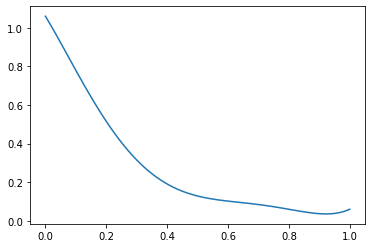

In [9]:
def f(x):
    return 1/(1+25*x**2)

def g(n):
    v,err=integrate.quad(lambda x:x**n,0,1)
    return v

def b(n):
    v,err=integrate.quad(lambda x:f(x)*x**n,0,1)
    return v

def p(k,x):
    G=[]
    for i in range(k+1):
        G.append([])
        for j in range(k+1):
            G[i].append(g(i+j))
    d=[]
    for i in range(k+1):
        d.append(b(i))
    a=[]
    a=linalg.solve(G,d)
    a=a.tolist()
    i=0
    p=0
    while i<k+1:
        p=p+a[i]*x**i
        i=i+1
    return p

plt.figure()
x=np.linspace(0,1,100)
plt.plot(x,p(5,x))

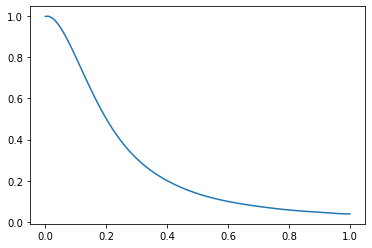

In [10]:
plt.plot(x,p(10,x))

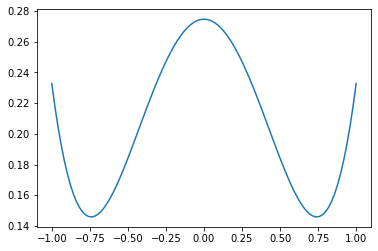

In [18]:
def LE(x,k):
    if(k==0):
        return 1
    elif(k==1):
        return x
    else:
        return (2*k-1)/k*x*LE(x,k-1)-(k-1)/k*LE(x,k-2)

def gLE(i,j):
    v, err=integrate.quad(lambda x:LE(x, i)*LE(x, j),-1,1)
    return v

def bLE(n):
    v, err=integrate.quad(lambda x:f(x)*LE(x,n),-1,1)
    return v

def pLE(k,x):
    G=[]
    for i in range(k+1):
        G.append([])
        for j in range(k+1):
            G[i].append(gLE(i,j))
    d=[]
    for i in range(k+1):
        d.append(bLE(i))
    a=[]
    a=linalg.solve(G,d)
    a=a.tolist()
    i=0
    p=0
    while i<k+1:
        p=p+a[i]*x**i
        i=i+1
    return p

plt.figure()
x=np.linspace(-1,1,100)
plt.plot(x,pLE(5,x))

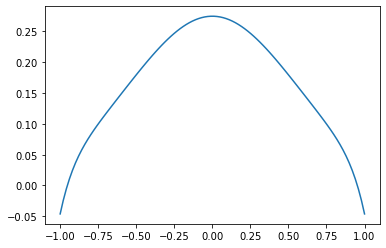

In [19]:
plt.plot(x,pLE(10,x))

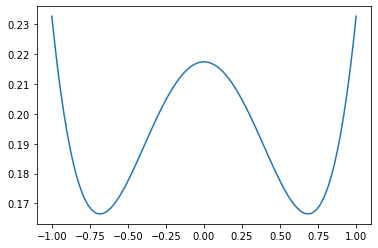

In [20]:
def Cheb(x,k):
    if(k==0):
        return 1
    elif(k==1):
        return x
    else:
        return 2*x*Cheb(x,k-1)-Cheb(x,k-2)

def gCheb(i,j):
    v,err=integrate.quad(lambda x:Cheb(x,i)*Cheb(x,j),-1,1)
    return v

def bCheb(n):
    v,err=integrate.quad(lambda x:f(x)*Cheb(x,n),-1,1)
    return v

def pCheb(k,x):
    G=[]
    for i in range(k+1):
        G.append([])
        for j in range(k+1):
            G[i].append(gCheb(i,j))
    d=[]
    for i in range(k+1):
        d.append(bCheb(i))
    a=[]
    a=linalg.solve(G,d)
    a=a.tolist()
    i=0
    p=0
    while i<k+1:
        p=p+a[i]*x**i
        i=i+1
    return p

plt.figure()
x=np.linspace(-1,1,100)
plt.plot(x,pCheb(5,x))

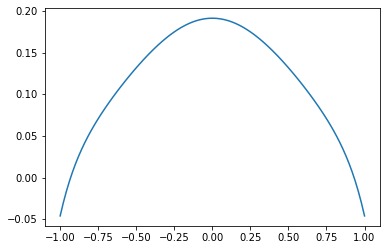

In [21]:
plt.plot(x,pCheb(10,x))

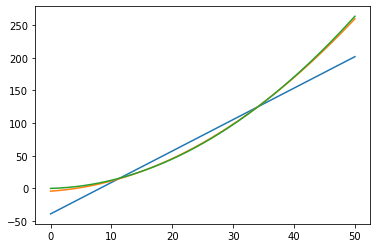

In [29]:
X=[5,10,15,20,25,30,35,40]
Y=[3.42,5.96,31.14,41.76,74.54,94.32,133.78,169.16 ]

def ggg(n):
    a=0
    for i in range(8):
        a=a+X[i]**n
    return a

def ddd(n):
    a=0
    for i in range(8):
        a=a+Y[i]*X[i]**n
    return a

def p1(x):
    G=[]
    for i in range(2):
        G.append([])
        for j in range(2):
            G[i].append(ggg(i+j))
    d=[]
    for i in range(2):
        d.append(ddd(i))
    a=[]
    a = linalg.solve(G, d)
    a=a.tolist()
    return a[0]+a[1]*x

def p2(x):
    G=[]
    for i in range(3):
        G.append([])
        for j in range(3):
            G[i].append(ggg(i+j))
    d=[]
    for i in range(3):
        d.append(ddd(i))
    a=[]
    a = linalg.solve(G, d)
    a=a.tolist()
    return a[0]+a[1]*x+a[2]*x**2

def p3(x):
    G=[]
    for i in range(2):
        G.append([])
        for j in range(2):
            G[i].append(ggg(i+j+2))
    d=[]
    for i in range(2):
        d.append(ddd(i+1))
    a=[]
    a = linalg.solve(G, d)
    a=a.tolist()
    return a[0]*x+a[1]*x**2

plt.figure()
x=np.linspace(0,50,1000)
plt.plot(x,p1(x))
plt.plot(x,p2(x))
plt.plot(x,p3(x))
plt.show()

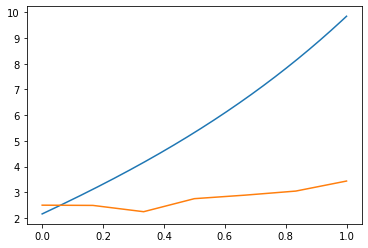

In [37]:
import random
X=np.linspace(0,1,7)
X=X.tolist()
Y=[]
for i in range(7):
    Y.append(math.exp(X[i])+math.exp(-X[i])+0.1*random.uniform(1,7))

def gggg(i,j):
    a=0
    for k in range(7):
        a=a+math.exp(X[k])**i*math.exp(-X[k])**j
    return a
 
def dddd(n):
    a=0
    for i in range(7):
        a=a+math.exp(X[i])**n*Y[i]
    return a

def p(x):
    G=[]
    for i in range(2):
        G.append([])
        for j in range(2):
            G[i].append(gggg(i,j))
    d=[]
    for i in range(2):
        d.append(dddd(i))
    a=[]
    a = linalg.solve(G, d)
    a=a.tolist()
    return a[0]*math.exp(x)+a[1]*math.exp(-x)

plt.figure()
x=np.linspace(0,1,1000)
x=x.tolist()
y=[]
for i in range(1000):
    y.append(p(x[i]))

plt.plot(x,y)
plt.plot(X,Y)